# 什么是神经网络的学习?

比如说下面这一段代码,输入为[1,4],然后后面的全连接层后面用的softmax,转变为分类问题. 然后输出的两个概率就是神经网络对这个输入的理解. 

本质上,神经网络不对这些数据具有意义化,意义这个概念是人赋予的.,所以让神经网络学习本质上就是找矩阵,让神经网络内部的权重矩阵和偏置矩阵能够表达我们所希望的 "映射" ,神经网络这个架构,有能力表达很复杂的函数,这个函数就是可以用来解决分类问题和回归问题.所以接下来要学的就是如何通过数学工具来帮助我们找到这样合适的矩阵.

In [2]:
import torch
import numpy as np
def init_network():
    network = {}

    network["W1"] = torch.rand(size=(6,3)).numpy()
    network["W2"] = torch.rand(size=(3,2)).numpy()
    network["W3"] = torch.rand(size=(2,4)).numpy()

    network['b1'] = torch.rand(size=(3,)).numpy()
    network['b2'] = torch.rand(size=(2,)).numpy()
    network['b3'] = torch.rand(size=(4,)).numpy()

    return network
def step_sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(input):
    # 恒等函数
    return input

def softmax_function(a):
    c = np.max(a)
    expa = np.exp(a - c)
    # overflow avoid
    sum_exp = np.sum(expa)
    y = expa / sum_exp
    return y


def forward(network,input):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']

    a1 = np.dot(input,W1) + b1
    z1 = step_sigmoid(a1)

    a2 = np.dot(z1,W2) + b2
    z2 = step_sigmoid(a2)

    a3 = np.dot(z2,W3) + b3

    # y = identity_function(a3)
    y = softmax_function(a3)
    return y 

input = [1,4,1,3,5,7]
network = init_network()
output = forward(network,input)
print(output)

[0.26124578 0.15173481 0.23233059 0.35468881]


# 特征量

从输入数据到向量,能够用数字表达各种数据的一种表达. 找特征量是人为接入的.

机器学习和神经网络的学习差别是,神经网络和人一样,直接学习图片的信息,而传统机器学习需要先转为特征量.

# 神经网络的优点

直接从数据本身出发,寻找一个模式.和人的思考相似.

# 训练数据和测试数据

训练数据,就是拿来寻找那个合适的参数的数据,也成为监督数据.

追求的是模型的泛化能力. 是指处理未被观察过的数据.

# 过拟合

就是如果训练数据过于单一,那么参数就会只适用于这一套数据.

# 损失函数

神经网络以 某一个指标寻找最优权重参数,这个指标就是最优函数.
神经网络通过某个指标表达现在的状态.


In [3]:
# mean squared error

def mean_squared_error(pred,real):
    # 均方误差,越小就意味着分类约准确
    # 通俗理解为两个向量之间的距离差距
    return (1/len(pred)) * np.sum((pred-real)**2)

real = [0,1,0,0]
input = [0,1,1,6,8,3]
pred =  forward(network,input)
pred,mean_squared_error(pred,real) # 均方误差


(array([0.26124579, 0.15173482, 0.2323306 , 0.35468879]), 0.24189620531250505)

In [4]:
# 交叉信息熵

def cross_entropy_error(pred,real):
    # 就是重点关注 在正确的上面,是不是熵越小
    # 还是符合 误差越大,这个数字就越大
    delta = 1e-7 # avoid overflow
    return -np.sum(real * np.log(pred+delta))

real = [0,1,0,0]
input1 = [0,1,1,6,8,3]
input2 = [4,244,24442,464,-428,455]
pred1 =  forward(network,input1)
pred2 =  forward(network,input2)
print(pred1,pred2)
cross_entropy_error(pred1,real),cross_entropy_error(pred2,real) # 均方误差


[0.26124579 0.15173482 0.2323306  0.35468879] [0.26124564 0.15173472 0.23233067 0.35468898]


(1.8856202226190368, 1.8856209135548196)

In [5]:
0.51904581- 0.51907751  ,0.6557629318049996 - 0.6557018601639042

(-3.1699999999967865e-05, 6.107164109536711e-05)

# mini batch 学习

In [6]:
# random choice

sources = [1,2,3,4,5,6,7,8,9,10,11]
print(np.random.choice(sources,4))
print(np.random.choice(10,4))

[1 8 3 5]
[0 2 6 7]


In [7]:
# flatten reshapes

array1 = np.array([1,2,3,4. ])
print(array1.ndim,array1.reshape(1,array1.size))

1 [[1. 2. 3. 4.]]


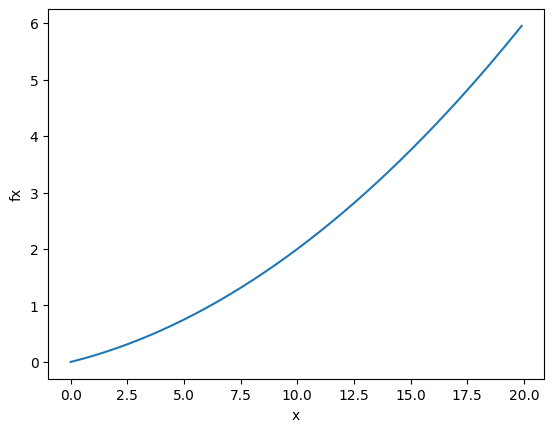

0.1999999999990898
0.2999999999986347


In [8]:
# 中心差分求导

def numerical_diff(func,x):
    delta = 1e-4 
    return (func(x+delta) - func(x-delta)) / (2 * delta)

def function_1(x):
    return 0.01 * (x **2) + 0.1 * x

import matplotlib.pyplot as plt
x = np.arange(0.0,20.0,0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("fx")
plt.plot(x,y)
plt.show()

print(numerical_diff(function_1,5))
print(numerical_diff(function_1,10))



# 偏导数



In [9]:
def function2(x):
    return (x[0]) **2 +( x[1])**2

def function2_x0(x0):# 在 x0 =3 x1 =4 的时候对 x0 求偏导
    return  x0*x0 + 4 **2
def function2_x1(x1):# 在 x0 =3 x1 =4 的时候对 x0 求偏导
    return  3**2 + x1 *x1

numerical_diff(function2_x0,3),numerical_diff(function2_x1,4)


(6.00000000000378, 7.999999999999119)

In [10]:

def numerical_gradient(func,input_points_array):
    # 计算梯度,就是在输入维度的每个维度上求其导数
    delta = 1e-4
    tmp_shape = input_points_array.shape
    # 缓存原始矩阵形状 如 2,3 ! size 返回的是长度
    # 扁平化处理
    if input_points_array.ndim != 1:
        input_points_array = input_points_array.reshape(1,input_points_array.size).squeeze()
    
    # 扁平化后直接迭代全部,求偏导
    grad = np.zeros_like(input_points_array)
    for index in range(input_points_array.size):
        temp_val = input_points_array[index]
        # f(x+h)
        input_points_array[index] = temp_val + delta
        fv1 = func(input_points_array)

        input_points_array[index] = temp_val - delta
        fv2 = func(input_points_array)

        grad[index] = (fv1 - fv2) / (delta * 2)
        input_points_array[index] = temp_val
    
    # 还原原始维度
    input_points_array = input_points_array.reshape(tmp_shape)
    grad = grad.reshape(tmp_shape)
    return grad
numerical_gradient(function2,np.array([3.0,4.0]))

array([6., 8.])

In [11]:
def gradient_decent(f,init_x,lr=0.1,step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad # 梯度下降 
    return x

input1 = np.array([3.0,4.0])
gradient_decent(function2,init_x=input1)

array([6.11110793e-10, 8.14814391e-10])